In [315]:
# Dependencies
import pandas as pd
import numpy as np
import os

# Python SQL toolkit and ORM
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, Date

from matplotlib import pyplot as plt

from flask import Flask, jsonify

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
conn = engine.connect()

In [33]:
stations = pd.read_sql_table("stations", conn)
stations

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [5]:
measurements = pd.read_sql_table("measurements", conn, parse_dates={'date': '%Y-%m-%d'})
measurements.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65
1,2,USC00519397,2010-01-02,0.00,63
2,3,USC00519397,2010-01-03,0.00,74
3,4,USC00519397,2010-01-04,0.00,76
4,5,USC00519397,2010-01-07,0.06,70


<font size="5"> <strong> Precipitation Analysis </strong> </font>

<ol>

<li> Design a query to retrieve the last 12 months of precipitation data.</li>

<li> Select only the date and prcp values.</li>

<li> Load the query results into a Pandas DataFrame and set the index to the date column.</li>

<li> Plot the results using the DataFrame plot method.</li>

</ol>

In [6]:
last_year = conn.execute("SELECT date, prcp FROM measurements WHERE date >= datetime('now', '-12 months') LIMIT 5 ").fetchall()
last_year

[('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-09', 0.0)]

In [18]:
max_date = conn.execute("SELECT max(date) FROM measurements").fetchall()
max_date

[('2017-08-23',)]

In [59]:
last_year_df = pd.read_sql("SELECT * FROM measurements WHERE date >= datetime('2017-08-23', '-12 months') ", conn)
last_year_df = last_year_df.sort_values("date")
last_year_df.head()

,id,station,date,prcp,tobs
0,2328,USC00519397,2016-08-24,0.08,79
1024,10603,USC00519523,2016-08-24,1.22,79
700,7055,USC00514830,2016-08-24,2.28,80
1688,17777,USC00516128,2016-08-24,1.45,74
358,5040,USC00513117,2016-08-24,2.15,76


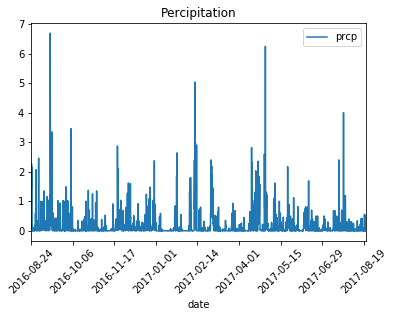

In [58]:
last_year_df.plot(x='date', y ='prcp', rot = 45, kind='line', title = 'Percipitation')
plt.show()

<font size="5"> <strong> Station Analysis </strong> </font>

<ol>
<li> Design a query to calculate the total number of stations. </li>

<li> Design a query to find the most active stations. </li>

<li> List the stations and observation counts in descending order. </li>

<li> Which station has the highest number of observations? </li>

<li> Design a query to retrieve the last 12 months of temperature observation data (tobs). </li>

<li> Filter by the station with the highest number of observations. </li>

Plot the results as a histogram with bins=12.
</ol>

In [43]:
total_stations = pd.read_sql("SELECT count(station) AS 'Total Stations' FROM stations", conn)
total_stations

,Total Stations
0,9


In [83]:
station_count = pd.read_sql("SELECT stations.station AS 'Stations', count(measurements.tobs) AS Counts FROM stations JOIN measurements ON measurements.station=stations.station GROUP BY stations.station ORDER BY Counts DESC", conn)
station_count

,Stations,Counts
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [87]:
winner = pd.read_sql("SELECT station, count(tobs) AS count FROM measurements WHERE date >= datetime('2017-08-23', '-12 months') GROUP BY station LIMIT 1", conn)
winner.head()

,station,count
0,USC00513117,342


In [118]:
winner_tobs = pd.read_sql("SELECT station, tobs FROM measurements WHERE date >= datetime('2017-08-23', '-12 months') AND station = 'USC00513117'", conn)
winner_tobs.head()

,station,tobs
0,USC00513117,76
1,USC00513117,77
2,USC00513117,78
3,USC00513117,73
4,USC00513117,73


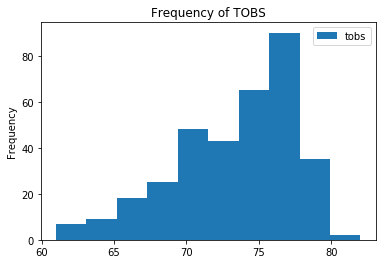

In [119]:
winner_tobs.plot(x='station', y='tobs', kind = 'hist', title = 'Frequency of TOBS')
plt.ylabel('Frequency')
plt.show()

<font size='5'> <strong> Temperature Analysis </strong> </font>
<ol>
<li> Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.</li>

<li>  Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")</li>

<li>  Plot the min, avg, and max temperature from your previous query as a bar chart.</li> <ul>
<li> Use the average temperature as the bar height.</li>

<li> Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr). </li> </ul></ol>

Enter start date in the format %Y-%m-%d2011-02-03
Enter end date in the format %Y-%m-%d2011-05-06
The minimum tobs is: 59. The maximum tobs is: 80. The average tobs is: 70.0


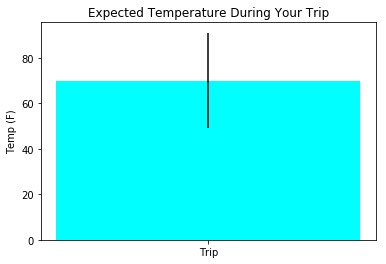

None


In [317]:
def calc_temps():
    start = input("Enter start date in the format %Y-%m-%d")
    end = input("Enter end date in the format %Y-%m-%d")
    start = start.strip()
    end = end.strip()
    minimumm = conn.execute("SELECT tobs FROM measurements WHERE date BETWEEN datetime('" + start + "', '-1 year') AND datetime('" + end + "', '-1 year') ORDER BY tobs ASC LIMIT 1").fetchone()[0]
    maximum = conn.execute("SELECT tobs FROM measurements WHERE date BETWEEN datetime('" + start + "', '-1 year') AND datetime('" + end + "', '-1 year') ORDER BY tobs DESC LIMIT 1").fetchone()[0]
    average = conn.execute("SELECT ROUND(AVG(tobs)) FROM measurements WHERE date BETWEEN datetime('" + start + "', '-1 year') AND datetime('" + end + "', '-1 year') ORDER BY tobs DESC LIMIT 1").fetchone()[0]
    
    print("The minimum tobs is: " + str(minimumm) + 
          ". The maximum tobs is: " + str(maximum) + 
          ". The average tobs is: " + str(average))
    
    x = ["Trip"]
    y = [average]
    e = [maximum-minimumm]
    plt.bar(x, y, color = 'cyan')
    plt.errorbar(x, y, yerr=e, ecolor= 'black', capthick = 2)
    plt.ylabel("Temp (F)")
    plt.title("Expected Temperature During Your Trip")
    
    
    return plt.show()

print(calc_temps())



<font size ='5'> <strong> Optional Recommended Analysis </strong> </font>
<ol>

<li> The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.
<ul>
<li>Calcualte the rainfall per weather station using the previous year's matching dates.
<li>Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.
</ul>
<li>Create a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.
<ul>
<li>Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.
<li>Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
<li>Use Pandas to plot an area plot (stacked=False) for the daily normals.
</ul>
</ol>

In [313]:
session = Session(engine) 

# Flask Setup
app = Flask(__name__)

In [314]:
@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations</br>"
        f"/api/v1.0/tobs</br>"
        f"/api/v1.0/<start>"
        f"/api/v1.0/<start>/<end>"
    )

@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return a list of temperature observations from the last year"""
    # Query for the dates and temperature observations from the last year
    results = session.query("SELECT date, tobs FROM measurements WHERE date >= datetime('2017-08-23', '-12 months')")
    
    # Create a dictionary from the row data and append to a list of tobs
    tobs = []
    for temp in results:
        temp_dict = {}
        temp_dict[temp.date] = temp.tobs
        tobs.append(temp_dict)


    return jsonify(tobs)

@app.route("/api/v1.0/stations")
def stations():
    """Return a json list of stations from the dataset."""
    # Query for the dates and temperature observations from the last year
    results = session.query(stations.station).all()
    
    stations = list(np.ravel(results))

    return jsonify(stations)

if __name__ == '__main__':
    app.run(debug=True)
    

OSError: [Errno 48] Address already in use

In [ ]:
http://127.0.0.1:5000/ 